# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Laetisha Haryanto
- **Email:** laetishaharyanto@gmail.com
- **ID Dicoding:** MC006D5X2407

## Menentukan Pertanyaan Bisnis
-  Bagaimana pola tingkat polusi udara berdasarkan musim?
-  Bagaimana distribusi tingkat polusi berdasarkan kategori (rendah, sedang, tinggi, sangat tinggi)?
-  Seberapa sering suatu daerah mengalami lonjakan polusi pada tahun 2013-2017?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import os

## Data Wrangling

### Gathering Data

In [4]:
Aotizhongxin_df = pd.read_csv(r"C:\Users\Dell\Desktop\DICODING\Python\proyek_andat1\PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv")

Aotizhongxin_df['date'] = pd.to_datetime(Aotizhongxin_df[['year', 'month', 'day']])
Aotizhongxin_df.drop(columns=['year', 'month', 'day'], inplace=True)
kolom_urutan = ['No', 'date'] + [col for col in Aotizhongxin_df.columns if col not in ['No', 'date']]
Aotizhongxin_df = Aotizhongxin_df[kolom_urutan]

Aotizhongxin_df.head()

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013-03-01,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013-03-01,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013-03-01,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013-03-01,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Memuat tabel Aotizhongxin
- Menggabungkan kolom year, month, dan day menjadi date (tanggal)
- Menampilkan head data Aotizhongxin

In [5]:
# Memuat tabel Changping
Changping_df = pd.read_csv(r"C:\Users\Dell\Desktop\DICODING\Python\proyek_andat1\PRSA_Data_20130301-20170228\PRSA_Data_Changping_20130301-20170228.csv")

Changping_df['date'] = pd.to_datetime(Changping_df[['year', 'month', 'day']])
Changping_df.drop(columns=['year', 'month', 'day'], inplace=True)
kolom_urutan = ['No', 'date'] + [col for col in Changping_df.columns if col not in ['No', 'date']]
Changping_df = Changping_df[kolom_urutan]

Changping_df.head()

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013-03-01,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013-03-01,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013-03-01,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013-03-01,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- Memuat tabel Changping
- Menggabungkan kolom year, month, dan day menjadi date (tanggal)
- Menampilkan head data Changping

In [6]:
#Memuat tabel Gucheng
Gucheng_df = pd.read_csv(r"C:\Users\Dell\Desktop\DICODING\Python\proyek_andat1\PRSA_Data_20130301-20170228\PRSA_Data_Gucheng_20130301-20170228.csv")

Gucheng_df['date'] = pd.to_datetime(Gucheng_df[['year', 'month', 'day']])
Gucheng_df.drop(columns=['year', 'month', 'day'], inplace=True)
kolom_urutan = ['No', 'date'] + [col for col in Gucheng_df.columns if col not in ['No', 'date']]
Gucheng_df = Gucheng_df[kolom_urutan]

Gucheng_df.head()

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013-03-01,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013-03-01,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013-03-01,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013-03-01,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


**Insight:**
- Memuat tabel Gucheng
- Menggabungkan kolom year, month, dan day menjadi date (tanggal)
- Menampilkan head data Gucheng

In [7]:
#Memuat tabel Shunyi
Shunyi_df = pd.read_csv(r"C:\Users\Dell\Desktop\DICODING\Python\proyek_andat1\PRSA_Data_20130301-20170228\PRSA_Data_Shunyi_20130301-20170228.csv")

Shunyi_df['date'] = pd.to_datetime(Shunyi_df[['year', 'month', 'day']])
Shunyi_df.drop(columns=['year', 'month', 'day'], inplace=True)
kolom_urutan = ['No', 'date'] + [col for col in Shunyi_df.columns if col not in ['No', 'date']]
Shunyi_df = Shunyi_df[kolom_urutan]

Shunyi_df.head()

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013-03-01,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013-03-01,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013-03-01,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013-03-01,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Insight:**
- Memuat tabel Shunyi
- Menggabungkan kolom year, month, dan day menjadi date (tanggal)
- Menampilkan head data Shunyi

In [8]:
#Memuat tabel Tiantan
Tiantan_df = pd.read_csv(r"C:\Users\Dell\Desktop\DICODING\Python\proyek_andat1\PRSA_Data_20130301-20170228\PRSA_Data_Tiantan_20130301-20170228.csv")

Tiantan_df['date'] = pd.to_datetime(Tiantan_df[['year', 'month', 'day']])
Tiantan_df.drop(columns=['year', 'month', 'day'], inplace=True)
kolom_urutan = ['No', 'date'] + [col for col in Tiantan_df.columns if col not in ['No', 'date']]
Tiantan_df = Tiantan_df[kolom_urutan]

Tiantan_df.head()

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013-03-01,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013-03-01,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013-03-01,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013-03-01,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- Memuat tabel Tiantan
- Menggabungkan kolom year, month, dan day menjadi date (tanggal)
- Menampilkan head data Tiantan

### Assessing Data

In [9]:
#Menilai Data Aotizhongxin
Aotizhongxin_df.info() #Menampilkan informasi
Aotizhongxin_df.isna().sum() #Menampilkan jumlah missing values
print("Jumlah duplikasi: ", Aotizhongxin_df.duplicated().sum()) #Menampilkan jumlah data yang terduplikat
Aotizhongxin_df.describe() #Menampilkan ringkasan parameter statistik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   hour     35064 non-null  int64         
 3   PM2.5    34139 non-null  float64       
 4   PM10     34346 non-null  float64       
 5   SO2      34129 non-null  float64       
 6   NO2      34041 non-null  float64       
 7   CO       33288 non-null  float64       
 8   O3       33345 non-null  float64       
 9   TEMP     35044 non-null  float64       
 10  PRES     35044 non-null  float64       
 11  DEWP     35044 non-null  float64       
 12  RAIN     35044 non-null  float64       
 13  wd       34983 non-null  object        
 14  WSPM     35050 non-null  float64       
 15  station  35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(2), object(2)
memory usage: 4.3+ MB

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2015-03-01 00:00:00,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
min,1.000000,2013-03-01 00:00:00,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014-03-01 00:00:00,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015-03-01 00:00:00,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016-02-29 00:00:00,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017-02-28 00:00:00,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000
std,10122.249256,NaN,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071


 **Insight:**
- Pada data Aotizhongxin, terdapat beberapa missing values pada kolom PM2.5, PM10, SO2, NO2, CO, O3,TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tidak terdapat data yang terduplikat
- Terdapat inakurasi pada kolom PM2.5, dan PM10

In [10]:
#Menilai Data Changping
Changping_df.info() #Menampilkan informasi
Changping_df.isna().sum() #Menampilkan jumlah missing values
print("Jumlah duplikasi: ", Changping_df.duplicated().sum()) #Menampilkan jumlah data yang terduplikat
Changping_df.describe() #Menampilkan ringkasan parameter statistik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   hour     35064 non-null  int64         
 3   PM2.5    34290 non-null  float64       
 4   PM10     34482 non-null  float64       
 5   SO2      34436 non-null  float64       
 6   NO2      34397 non-null  float64       
 7   CO       33543 non-null  float64       
 8   O3       34460 non-null  float64       
 9   TEMP     35011 non-null  float64       
 10  PRES     35014 non-null  float64       
 11  DEWP     35011 non-null  float64       
 12  RAIN     35013 non-null  float64       
 13  wd       34924 non-null  object        
 14  WSPM     35021 non-null  float64       
 15  station  35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(2), object(2)
memory usage: 4.3+ MB

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2015-03-01 00:00:00,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
min,1.000000,2013-03-01 00:00:00,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014-03-01 00:00:00,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015-03-01 00:00:00,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016-02-29 00:00:00,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017-02-28 00:00:00,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000
std,10122.249256,NaN,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808


 **Insight:**
- Pada data Changping, terdapat beberapa missing values pada kolom PM2.5, PM10, SO2, NO2, CO, O3,TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tidak terdapat data yang terduplikat
- Terdapat inakurasi pada kolom PM2.5, dan PM10

In [11]:
#Menilai Data Gucheng
Gucheng_df.info() #Menampilkan informasi
Gucheng_df.isna().sum() #Menampilkan jumlah missing values
print("Jumlah duplikasi: ", Gucheng_df.duplicated().sum()) #Menampilkan jumlah data yang terduplikat
Gucheng_df.describe() #Menampilkan ringkasan parameter statistik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   hour     35064 non-null  int64         
 3   PM2.5    34418 non-null  float64       
 4   PM10     34683 non-null  float64       
 5   SO2      34557 non-null  float64       
 6   NO2      34396 non-null  float64       
 7   CO       33663 non-null  float64       
 8   O3       34335 non-null  float64       
 9   TEMP     35013 non-null  float64       
 10  PRES     35014 non-null  float64       
 11  DEWP     35013 non-null  float64       
 12  RAIN     35021 non-null  float64       
 13  wd       34905 non-null  object        
 14  WSPM     35022 non-null  float64       
 15  station  35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(2), object(2)
memory usage: 4.3+ MB

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2015-03-01 00:00:00,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
min,1.000000,2013-03-01 00:00:00,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014-03-01 00:00:00,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015-03-01 00:00:00,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016-02-29 00:00:00,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017-02-28 00:00:00,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000
std,10122.249256,NaN,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064


 **Insight:**
- Pada data Gucheng, terdapat beberapa missing values pada kolom PM2.5, PM10, SO2, NO2, CO, O3,TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tidak terdapat data yang terduplikat
- Terdapat inakurasi pada kolom PM2.5, dan PM10

In [12]:
#Menilai Data Shunyi
Shunyi_df.info() #Menampilkan informasi
Shunyi_df.isna().sum() #Menampilkan jumlah missing values
print("Jumlah duplikasi: ", Shunyi_df.duplicated().sum()) #Menampilkan jumlah data yang terduplikat
Shunyi_df.describe() #Menampilkan ringkasan parameter statistik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   hour     35064 non-null  int64         
 3   PM2.5    34151 non-null  float64       
 4   PM10     34516 non-null  float64       
 5   SO2      33768 non-null  float64       
 6   NO2      33699 non-null  float64       
 7   CO       32886 non-null  float64       
 8   O3       33575 non-null  float64       
 9   TEMP     35013 non-null  float64       
 10  PRES     35013 non-null  float64       
 11  DEWP     35010 non-null  float64       
 12  RAIN     35013 non-null  float64       
 13  wd       34581 non-null  object        
 14  WSPM     35020 non-null  float64       
 15  station  35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(2), object(2)
memory usage: 4.3+ MB

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2015-03-01 00:00:00,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
min,1.000000,2013-03-01 00:00:00,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014-03-01 00:00:00,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015-03-01 00:00:00,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016-02-29 00:00:00,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017-02-28 00:00:00,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000
std,10122.249256,NaN,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817


 **Insight:**
- Pada data Shunyi, terdapat beberapa missing values pada kolom PM2.5, PM10, SO2, NO2, CO, O3,TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tidak terdapat data yang terduplikat
- Terdapat inakurasi pada kolom PM2.5, dan PM10

In [13]:
#Menilai Data Tiantan
Tiantan_df.info() #Menampilkan informasi
Tiantan_df.isna().sum() #Menampilkan jumlah missing values
print("Jumlah duplikasi: ", Tiantan_df.duplicated().sum()) #Menampilkan jumlah data yang terduplikat
Tiantan_df.describe() #Menampilkan ringkasan parameter statistik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   hour     35064 non-null  int64         
 3   PM2.5    34387 non-null  float64       
 4   PM10     34467 non-null  float64       
 5   SO2      33946 non-null  float64       
 6   NO2      34320 non-null  float64       
 7   CO       33938 non-null  float64       
 8   O3       34221 non-null  float64       
 9   TEMP     35044 non-null  float64       
 10  PRES     35044 non-null  float64       
 11  DEWP     35044 non-null  float64       
 12  RAIN     35044 non-null  float64       
 13  wd       34986 non-null  object        
 14  WSPM     35050 non-null  float64       
 15  station  35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(2), object(2)
memory usage: 4.3+ MB

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2015-03-01 00:00:00,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
min,1.000000,2013-03-01 00:00:00,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014-03-01 00:00:00,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015-03-01 00:00:00,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016-02-29 00:00:00,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017-02-28 00:00:00,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000
std,10122.249256,NaN,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368


 **Insight:**
- Pada data Tiantan, terdapat beberapa missing values pada kolom PM2.5, PM10, SO2, NO2, CO, O3,TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tidak terdapat data yang terduplikat
- Terdapat inakurasi pada kolom PM2.5, dan PM10

## Cleaning Data

In [14]:
#Membersihkan data Aotizhongxin
##Penanganan missing value
missingvalue_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
Aotizhongxin_df[missingvalue_cols] = Aotizhongxin_df[missingvalue_cols].interpolate(method='linear', limit_direction='forward')
Aotizhongxin_df = Aotizhongxin_df.dropna(subset=['wd']) #Menghapus missing value pada data type object
Aotizhongxin_df.isna().sum()

No         0
date       0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [15]:
##Penanganan inaccurate value
###Membuat fungsi replace, untuk nilai PM2.5 dan PM10 > 500 (batas normal) dibagi 10
def inaccurate_val(df, column, threshold=500):
    df[column] = df[column].apply(lambda x: x / 10 if x > threshold else x)
    return df
replace_cols = ["PM2.5", "PM10"]
for col in replace_cols:
    Aotizhongxin_df = inaccurate_val(Aotizhongxin_df, col)
Aotizhongxin_df.describe()

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34983.000000,34983,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000
mean,17501.749621,2015-02-27 17:14:52.513506560,11.501701,81.382467,107.135879,17.468061,59.029627,1263.915151,55.386811,13.599240,1011.837380,3.128504,0.067536,1.711037
min,1.000000,2013-03-01 00:00:00,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8747.500000,2014-02-28 00:00:00,6.000000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.200000,1003.200000,-8.100000,0.000000,0.900000
50%,17497.000000,2015-02-28 00:00:00,12.000000,58.000000,86.000000,9.000000,53.000000,900.000000,41.000000,14.600000,1011.400000,3.800000,0.000000,1.400000
75%,26247.500000,2016-02-27 00:00:00,17.000000,114.000000,152.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017-02-28 00:00:00,23.000000,500.000000,500.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000
std,10110.384422,NaN,6.918731,78.604415,87.427041,22.717112,36.977431,1239.256941,57.356991,11.397094,10.404231,13.691531,0.910845,1.203059


**Insight:**
- Missing values numerik ditangani dengan interpolasi, karena data time series
- Missing values kategorik dihapus
- Untuk inaccurate values, PM2.5 dan PM10 normalnya adalah tidak lebih dari 500µg/m³ maka nilai diatas 500 akan dibagi dengan 10 sebagai pengganti

In [16]:
#Membersihkan data Changping
##Penanganan missing value
missingvalue_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
Changping_df[missingvalue_cols] = Changping_df[missingvalue_cols].interpolate(method='linear', limit_direction='forward')
Changping_df = Changping_df.dropna(subset=['wd']) #Menghapus missing value pada data type object
Changping_df.isna().sum()

No         0
date       0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [17]:
##Penanganan inaccurate value
###Membuat fungsi replace, untuk nilai PM2.5 dan PM10 > 500 (batas normal) dibagi 10
def inaccurate_val(df, column, threshold=500):
    df[column] = df[column].apply(lambda x: x / 10 if x > threshold else x)
    return df
replace_cols = ["PM2.5", "PM10"]
for col in replace_cols:
    Changping_df = inaccurate_val(Changping_df, col)
Changping_df.describe()

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34924.000000,34924,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000
mean,17500.269414,2015-02-27 15:45:49.788111360,11.505584,70.582511,92.929088,14.950738,44.168521,1154.605410,58.103684,13.703548,1007.748336,1.502542,0.060257,1.858427
min,1.000000,2013-03-01 00:00:00,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8736.750000,2014-02-27 18:00:00,6.000000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.200000,-10.200000,0.000000,1.000000
50%,17498.500000,2015-02-28 00:00:00,12.000000,46.000000,71.200000,7.000000,36.000000,800.000000,46.695600,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26267.250000,2016-02-28 00:00:00,17.000000,99.000000,130.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017-02-28 00:00:00,23.000000,500.000000,500.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000
std,10118.406572,NaN,6.919138,71.343468,77.998765,21.029477,29.485597,1120.134348,54.305550,11.364295,10.227041,13.828258,0.753595,1.308638


**Insight:**
- Missing values numerik ditangani dengan interpolasi, karena data time series
- Missing values kategorik dihapus
- Untuk inaccurate values, PM2.5 dan PM10 normalnya adalah tidak lebih dari 500µg/m³ maka nilai diatas 500 akan dibagi dengan 10 sebagai pengganti

In [18]:
#Membersihkan data Gucheng
##Penanganan missing value
missingvalue_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
Gucheng_df[missingvalue_cols] = Gucheng_df[missingvalue_cols].interpolate(method='linear', limit_direction='forward')
Gucheng_df = Gucheng_df.dropna(subset=['wd']) #Menghapus missing value pada data type object
Gucheng_df.isna().sum()

No          0
date        0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2        20
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

In [19]:
##Penanganan inaccurate value
###Membuat fungsi replace, untuk nilai PM2.5 dan PM10 > 500 (batas normal) dibagi 10
def inaccurate_val(df, column, threshold=500):
    df[column] = df[column].apply(lambda x: x / 10 if x > threshold else x)
    return df
replace_cols = ["PM2.5", "PM10"]
for col in replace_cols:
    Gucheng_df = inaccurate_val(Gucheng_df, col)
Gucheng_df.describe()

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34905.000000,34905,34905.000000,34905.000000,34905.000000,34905.000000,34885.000000,34905.000000,34905.000000,34905.000000,34905.000000,34905.000000,34905.000000,34905.000000
mean,17516.124395,2015-02-28 07:36:51.362268672,11.510127,82.132749,115.567922,15.705719,55.799282,1336.655532,58.129062,13.874805,1008.831809,2.600829,0.064624,1.347432
min,1.000000,2013-03-01 00:00:00,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8743.000000,2014-02-28 00:00:00,6.000000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.700000,1000.400000,-9.000000,0.000000,0.600000
50%,17517.000000,2015-02-28 00:00:00,12.000000,59.000000,98.000000,7.000000,50.000000,967.073171,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.000000,2016-02-29 00:00:00,18.000000,115.000000,165.000000,20.000000,79.000000,1615.384615,84.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017-02-28 00:00:00,23.000000,500.000000,500.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000
std,10127.276939,NaN,6.918919,77.587537,88.273546,23.305869,36.516331,1214.120840,57.206416,11.295653,10.109106,13.789610,0.840025,1.150729


**Insight:**
- Missing values numerik ditangani dengan interpolasi, karena data time series
- Missing values kategorik dihapus
- Untuk inaccurate values, PM2.5 dan PM10 normalnya adalah tidak lebih dari 500µg/m³ maka nilai diatas 500 akan dibagi dengan 10 sebagai pengganti

In [20]:
#Membersihkan data Shunyi
##Penanganan missing value
missingvalue_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
Shunyi_df[missingvalue_cols] = Shunyi_df[missingvalue_cols].interpolate(method='linear', limit_direction='forward')
Shunyi_df = Shunyi_df.dropna(subset=['wd']) #Menghapus missing value pada data type object
Shunyi_df.isna().sum()

No         0
date       0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [21]:
##Penanganan inaccurate value
###Membuat fungsi replace, untuk nilai PM2.5 dan PM10 > 500 (batas normal) dibagi 10
def inaccurate_val(df, column, threshold=500):
    df[column] = df[column].apply(lambda x: x / 10 if x > threshold else x)
    return df
replace_cols = ["PM2.5", "PM10"]
for col in replace_cols:
    Shunyi_df = inaccurate_val(Shunyi_df, col)
Shunyi_df.describe()

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34581.000000,34581,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000
mean,17388.446777,2015-02-22 23:57:57.574390528,11.480784,77.634925,96.219714,13.424854,43.701472,1187.290246,54.692763,13.467819,1013.011838,2.475804,0.061742,1.829033
min,1.000000,2013-03-01 00:00:00,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8647.000000,2014-02-24 00:00:00,6.000000,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,3.000000,1004.700000,-8.900000,0.000000,1.000000
50%,17318.000000,2015-02-20 00:00:00,11.000000,54.000000,76.000000,5.000000,37.000000,900.000000,42.000000,14.500000,1012.700000,3.100000,0.000000,1.500000
75%,26134.000000,2016-02-22 00:00:00,17.000000,110.000000,137.000000,16.000000,62.000000,1500.000000,77.000000,23.300000,1021.000000,15.200000,0.000000,2.300000
max,35064.000000,2017-02-28 00:00:00,23.000000,500.000000,500.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000
std,10093.881260,NaN,6.898010,77.092189,82.734691,19.490008,30.623770,1148.732806,54.733745,11.482491,10.183744,13.760203,0.766298,1.281467


**Insight:**
- Missing values numerik ditangani dengan interpolasi, karena data time series
- Missing values kategorik dihapus
- Untuk inaccurate values, PM2.5 dan PM10 normalnya adalah tidak lebih dari 500µg/m³ maka nilai diatas 500 akan dibagi dengan 10 sebagai pengganti

In [22]:
#Membersihkan data Tiantan
##Penanganan missing value
missingvalue_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
Tiantan_df[missingvalue_cols] = Tiantan_df[missingvalue_cols].interpolate(method='linear', limit_direction='forward')
Tiantan_df = Tiantan_df.dropna(subset=['wd']) #Menghapus missing value pada data type object
Tiantan_df.isna().sum()

No         0
date       0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [23]:
##Penanganan inaccurate value
###Membuat fungsi replace, untuk nilai PM2.5 dan PM10 > 500 (batas normal) dibagi 10
def inaccurate_val(df, column, threshold=500):
    df[column] = df[column].apply(lambda x: x / 10 if x > threshold else x)
    return df
replace_cols = ["PM2.5", "PM10"]
for col in replace_cols:
    Tiantan_df = inaccurate_val(Tiantan_df, col)
Tiantan_df.describe()

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34986.000000,34986,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000
mean,17501.149831,2015-02-27 16:38:53.733493504,11.501572,80.941920,103.966984,14.525818,53.246257,1304.630581,56.224981,13.686244,1012.538789,2.452540,0.064126,1.863465
min,1.000000,2013-03-01 00:00:00,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8747.250000,2014-02-28 00:00:00,6.000000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17495.500000,2015-02-27 00:00:00,12.000000,58.000000,84.000000,7.000000,47.000000,900.000000,40.491900,14.600000,1012.200000,3.050000,0.000000,1.500000
75%,26246.750000,2016-02-27 00:00:00,17.000000,112.000000,142.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017-02-28 00:00:00,23.000000,500.000000,500.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000
std,10110.196385,NaN,6.918762,77.637699,83.133894,20.293130,32.028189,1179.586155,59.485558,11.456438,10.266577,13.813767,0.786929,1.279288


**Insight:**
- Missing values numerik ditangani dengan interpolasi, karena data time series
- Missing values kategorik dihapus
- Untuk inaccurate values, PM2.5 dan PM10 normalnya adalah tidak lebih dari 500µg/m³ maka nilai diatas 500 akan dibagi dengan 10 sebagai pengganti

## Exploratory Data Analysis (EDA)

### Explore Data Aotizhongxin_df

In [24]:
Aotizhongxin_df.describe(include="all")

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,34983.000000,34983,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983,34983.000000,34983
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,34983
mean,17501.749621,2015-02-27 17:14:52.513506560,11.501701,81.382467,107.135879,17.468061,59.029627,1263.915151,55.386811,13.599240,1011.837380,3.128504,0.067536,NaN,1.711037,NaN
min,1.000000,2013-03-01 00:00:00,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8747.500000,2014-02-28 00:00:00,6.000000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.200000,1003.200000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17497.000000,2015-02-28 00:00:00,12.000000,58.000000,86.000000,9.000000,53.000000,900.000000,41.000000,14.600000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26247.500000,2016-02-27 00:00:00,17.000000,114.000000,152.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN
max,35064.000000,2017-02-28 00:00:00,23.000000,500.000000,500.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,NaN,11.200000,NaN


**Insight:**
- Selama 5 tahun (2013-2017), arah angin (wd) di Aotizhongxin paling sering mengarah North East (NE) sebanyak 5140 kali
- Suhu (TEMP) paling rendah pernah mencapai -16.8, sedangkan paling tinggi mencapai 40.5
- Kadar karbon monoksida (CO) paling rendah mencapai 100 ppb sedangkan paling tinggi 10000 ppb dengan rata-rata 1263.91 ppb. Termasuk baik karena dibawah 25000 ppb
- Kadar ozon (O3) paling tinggi pernah mencapai 423 ppb, sudah termasuk merusak untuk manusia
- Nitrogen Dioksida (NO2) paling tinggi pernah mencapai 290 ppb termasuk merusak
- Sulfur Dioksida (SO2) berkisar antara 0.28 sampai 341 berarti pernah mencapai kurang baik karena diatas 80
- Untuk partikel 2.5 dan 10 (PM2.5, PM10) paling tinggi pernah mencapai area berbahaya,  rata-ratanya 81.38 dan 107.13 juga kurang baik

In [25]:
# Mengelompokkan suhu menjadi kategori
Aotizhongxin_df["TEMP_bin"] = pd.cut(Aotizhongxin_df["TEMP"], bins=[-20, 0, 10, 20, 30, 40], labels=["<0°C", "0-10°C", "10-20°C", "20-30°C", "30-40°C"])

# Mengelompokkan kecepatan angin menjadi kategori
Aotizhongxin_df["WSPM_bin"] = pd.cut(Aotizhongxin_df["WSPM"], bins=[0, 1, 3, 5, 10, 20], labels=["0-1 m/s", "1-3 m/s", "3-5 m/s", "5-10 m/s", "10+ m/s"])

# Mengelompokkan berdasarkan kombinasi suhu dan kecepatan angin
cuaca_polusi = Aotizhongxin_df.groupby(["TEMP_bin", "WSPM_bin"], observed=False)["PM2.5"].mean().unstack()

# Menampilkan tabel hasil
cuaca_polusi

WSPM_bin,0-1 m/s,1-3 m/s,3-5 m/s,5-10 m/s,10+ m/s
TEMP_bin,,,,,
<0°C,119.784388,90.396671,16.366621,11.865231,NaN
0-10°C,121.493234,91.485418,29.364341,18.045940,40.0
10-20°C,96.816585,75.487094,46.328791,33.020325,NaN
20-30°C,81.704816,73.300420,52.229520,44.102837,NaN
30-40°C,66.041420,62.865058,56.365848,55.933333,NaN


**Insight**
- Polusi (PM2.5) lebih tinggi ketika suhu rendah, pada saat suhu berada diantara 0-10°C (TEMP) rata-rata polusi mencapai 121.49 µg/m³. Sedangkan pada suhu 30-40°C, rata-rata polusi 66.04 µg/m³
- Saat kecepatan angin (WSPM) lemah pada 0-1 m/s rata-rata polusi tinggi. Sedangkan ketika kecepatan angin bertambah, rata-rata polusi semakin menurun dan membersihkan polusi udara.
- Ketika kecepatan angin 10+ m/s hanya tercatat pada suhu 0-10°C
- Pada suhu rendah dan kecepatan angin yang lemah, polusi akan mengendap di udara sehingga semakin tinggi. Sebaliknya suhu yang tinggi dan kecepatan angin kuat akan menyebar polusi sehingga konsentrasi PM2.5 berkurang di satu lokasi.

### Explore Data Changping_df

In [26]:
Changping_df.describe(include="all")

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,34924.000000,34924,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924.000000,34924,34924.000000,34924
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN,34924
mean,17500.269414,2015-02-27 15:45:49.788111360,11.505584,70.582511,92.929088,14.950738,44.168521,1154.605410,58.103684,13.703548,1007.748336,1.502542,0.060257,NaN,1.858427,NaN
min,1.000000,2013-03-01 00:00:00,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8736.750000,2014-02-27 18:00:00,6.000000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.200000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17498.500000,2015-02-28 00:00:00,12.000000,46.000000,71.200000,7.000000,36.000000,800.000000,46.695600,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000,NaN
75%,26267.250000,2016-02-28 00:00:00,17.000000,99.000000,130.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN
max,35064.000000,2017-02-28 00:00:00,23.000000,500.000000,500.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,NaN,10.000000,NaN


**Insight:**
- Selama 5 tahun (2013-2017), arah angin (wd) di Changping paling sering mengarah North North West (NNW) sebanyak 4776 kali
- Suhu (TEMP) paling rendah pernah mencapai -16.6, sedangkan paling tinggi mencapai 41.4
- Kadar karbon monoksida (CO) paling rendah mencapai 100 ppb sedangkan paling tinggi 2150 ppb dengan rata-rata 10000 ppb. Termasuk baik karena dibawah 25000 ppb
- Kadar ozon (O3) paling tinggi pernah mencapai 423 ppb, sudah termasuk merusak untuk manusia
- Nitrogen Dioksida (NO2) paling tinggi pernah mencapai 226 ppb termasuk merusak untuk kesehatan manusia
- Sulfur Dioksida (SO2) berkisar antara 0.28 sampai 310 berarti pernah kurang baik karena diatas 80
- Untuk partikel 2.5 dan 10 (PM2.5, PM10) paling tinggi pernah mencapai area berbahaya, namun rata-ratanya 70.58 dan 92.93 masih cukup baik

In [27]:

# Kelompokkan berdasarkan arah angin dan hitung rata-rata PM2.5
wind_pollution = Changping_df.groupby("wd")["PM2.5"].mean().sort_values(ascending=False)

# Menampilkan hasil dalam tabel
print(wind_pollution)

wd
ESE    98.099259
E      93.815927
SE     86.778141
ENE    84.510218
SSE    81.390642
SSW    80.506488
S      75.883236
SW     75.604118
WSW    69.418138
NNW    67.855388
N      64.225352
NE     62.923049
NNE    59.856175
NW     57.141440
W      55.365711
WNW    42.536846
Name: PM2.5, dtype: float64


**Insight**
- Angin dari arah Timur hingga Tenggara (ESE, E, SE) cenderung membawa polusi lebih tinggi (PM2.5), kemungkinan sumber polusi besar ada di bagian timur kota
- Angin dari arah Barat Laut (WNW) cenderung lebih bersih, dimana daerahnya lebih efektif dalam penyebaran polusi

### Eksplorasi Data Gucheng_df

In [28]:
Gucheng_df.describe(include="all")

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,34905.000000,34905,34905.000000,34905.000000,34905.000000,34905.000000,34885.000000,34905.000000,34905.000000,34905.000000,34905.000000,34905.000000,34905.000000,34905,34905.000000,34905
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949,NaN,34905
mean,17516.124395,2015-02-28 07:36:51.362268672,11.510127,82.132749,115.567922,15.705719,55.799282,1336.655532,58.129062,13.874805,1008.831809,2.600829,0.064624,NaN,1.347432,NaN
min,1.000000,2013-03-01 00:00:00,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8743.000000,2014-02-28 00:00:00,6.000000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.700000,1000.400000,-9.000000,0.000000,NaN,0.600000,NaN
50%,17517.000000,2015-02-28 00:00:00,12.000000,59.000000,98.000000,7.000000,50.000000,967.073171,45.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.000000,2016-02-29 00:00:00,18.000000,115.000000,165.000000,20.000000,79.000000,1615.384615,84.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN
max,35064.000000,2017-02-28 00:00:00,23.000000,500.000000,500.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,NaN,12.000000,NaN


**Insight:**
- Selama 5 tahun (2013-2017), arah angin (wd) di Gucheng paling sering mengarah North (N) sebanyak 3949 kali
- Suhu (TEMP) paling rendah pernah mencapai -15.6, sedangkan paling tinggi mencapai 41.6
- Kadar karbon monoksida (CO) paling rendah mencapai 100 ppb sedangkan paling tinggi 10000 ppb dengan rata-rata 1336.65 ppb. Termasuk baik karena dibawah 25000 ppb
- Kadar ozon (O3) paling tinggi pernah mencapai 450 ppb, sudah termasuk merusak untuk manusia
- Nitrogen Dioksida (NO2) paling tinggi pernah mencapai 276 ppb termasuk merusak
- Sulfur Dioksida (SO2) berkisar antara 0.28 sampai 500 berarti pernah mencapai tidak sehat karena diatas 380
- Untuk partikel 2.5 dan 10 (PM2.5, PM10) paling tinggi pernah mencapai area berbahaya, rata-ratanya 82.13 dan 115.56 kurang baik

### Eksplorasi Data Shunyi_df

In [29]:
Shunyi_df.describe(include="all")

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,34581.000000,34581,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581.000000,34581,34581.000000,34581
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNE,NaN,Shunyi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4540,NaN,34581
mean,17388.446777,2015-02-22 23:57:57.574390528,11.480784,77.634925,96.219714,13.424854,43.701472,1187.290246,54.692763,13.467819,1013.011838,2.475804,0.061742,NaN,1.829033,NaN
min,1.000000,2013-03-01 00:00:00,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,NaN,0.000000,NaN
25%,8647.000000,2014-02-24 00:00:00,6.000000,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,3.000000,1004.700000,-8.900000,0.000000,NaN,1.000000,NaN
50%,17318.000000,2015-02-20 00:00:00,11.000000,54.000000,76.000000,5.000000,37.000000,900.000000,42.000000,14.500000,1012.700000,3.100000,0.000000,NaN,1.500000,NaN
75%,26134.000000,2016-02-22 00:00:00,17.000000,110.000000,137.000000,16.000000,62.000000,1500.000000,77.000000,23.300000,1021.000000,15.200000,0.000000,NaN,2.300000,NaN
max,35064.000000,2017-02-28 00:00:00,23.000000,500.000000,500.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,NaN,12.800000,NaN


**Insight:**
- Selama 5 tahun (2013-2017), arah angin (wd) di Shunyi paling sering mengarah North North East (NE) sebanyak 4540 kali
- Suhu (TEMP) paling rendah pernah mencapai -16.8, sedangkan paling tinggi mencapai 40.6
- Kadar karbon monoksida (CO) paling rendah mencapai 100 ppb sedangkan paling tinggi 10000 ppb dengan rata-rata 1187.29 ppb. Termasuk baik karena dibawah 25000 ppb
- Kadar ozon (O3) paling tinggi pernah mencapai 351.71 ppb, sudah termasuk merusak untuk manusia
- Nitrogen Dioksida (NO2) paling tinggi pernah mencapai 258 ppb termasuk merusak
- Sulfur Dioksida (SO2) berkisar antara 0.28 sampai 239 berarti pernah mencapai area kurang baik karena diatas 80
- Untuk partikel 2.5 dan 10 (PM2.5, PM10) paling tinggi pernah mencapai area tidak sehat, namun rata-ratanya 77.63 dan 96.22 masih cukup baik

### Eksplorasi Data Tiantan_df

In [30]:
Tiantan_df.describe(include="all")

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,34986.000000,34986,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986,34986.000000,34986
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,34986
mean,17501.149831,2015-02-27 16:38:53.733493504,11.501572,80.941920,103.966984,14.525818,53.246257,1304.630581,56.224981,13.686244,1012.538789,2.452540,0.064126,NaN,1.863465,NaN
min,1.000000,2013-03-01 00:00:00,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8747.250000,2014-02-28 00:00:00,6.000000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17495.500000,2015-02-27 00:00:00,12.000000,58.000000,84.000000,7.000000,47.000000,900.000000,40.491900,14.600000,1012.200000,3.050000,0.000000,NaN,1.500000,NaN
75%,26246.750000,2016-02-27 00:00:00,17.000000,112.000000,142.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN
max,35064.000000,2017-02-28 00:00:00,23.000000,500.000000,500.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN


**Insight:**
- Selama 5 tahun (2013-2017), arah angin (wd) di Tiantan paling sering mengarah East North East (ENE) sebanyak 3861 kali
- Suhu (TEMP) paling rendah pernah mencapai -16.8, sedangkan paling tinggi mencapai 41.1
- Kadar karbon monoksida (CO) paling rendah mencapai 100 ppb sedangkan paling tinggi 10000 ppb dengan rata-rata 1304.63 ppb. Termasuk baik karena dibawah 25000 ppb
- Kadar ozon (O3) paling tinggi pernah mencapai 674 ppb, sudah termasuk merusak untuk manusia
- Nitrogen Dioksida (NO2) paling tinggi pernah mencapai 241 ppb termasuk merusak
- Sulfur Dioksida (SO2) berkisar antara 0.57 sampai 273 berarti pernah mencapai area kurang baik karena diatas 80
- Untuk partikel 2.5 dan 10 (PM2.5, PM10) paling tinggi pernah mencapai area berbahaya, rata-ratanya 80.94 dan 103.96 termasuk kurang baik

### Explore Data Gucheng_df, Shunyi_df, dan Tiantan_df

In [31]:
# Menambah kolom lokasi
Gucheng_df["Lokasi"] = "Gucheng"
Shunyi_df["Lokasi"] = "Shunyi"
Tiantan_df["Lokasi"] = "Tiantan"

# Menggabung Gucheng_df, Shunyi_df, dan Tiantan_df dalam 1 dataframe
combined_df = pd.concat([Gucheng_df, Shunyi_df, Tiantan_df])

# Hitung rata-rata PM2.5 per lokasi
pm25_avg = combined_df.groupby("Lokasi")["PM2.5"].mean()
print(pm25_avg)

Lokasi
Gucheng    82.132749
Shunyi     77.634925
Tiantan    80.941920
Name: PM2.5, dtype: float64


**Insight**
- Diantara ketiga lokasi, polusi (PM2.5) tertinggi berada di Gucheng dengan rata-rata 82.13
- Lokasi dengan polusi terendah adalah Shunyi dengan rata-rata 77.63

In [32]:
rain_wind_analysis = (combined_df.groupby("wd")["RAIN"].mean().sort_values(ascending=False).reset_index())
print(rain_wind_analysis)

     wd      RAIN
0   ENE  0.104454
1   NNE  0.099625
2     W  0.080387
3   NNW  0.079186
4   ESE  0.072001
5    NE  0.070589
6     E  0.069829
7   WNW  0.065034
8   SSE  0.055509
9     N  0.053885
10  WSW  0.052726
11   NW  0.044720
12   SW  0.043327
13   SE  0.043282
14  SSW  0.033820
15    S  0.033508


**Insight**
- Berdasarkan ketiga daerah, rata-rata hujan (RAIN) cenderung terjadi ketika angin berasal dari Timur Laut (ENE, NNE)
- Jarang terjadi hujan, ketika angin berasal dari selatan (SSW, S)

## Visualization & Explanatory Analysis

In [33]:
data_aqi = {
    "Aotizhongxin": Aotizhongxin_df,
    "Changping": Changping_df,
    "Gucheng": Gucheng_df,
    "Shunyi": Shunyi_df,
    "Tiantan": Tiantan_df
}

all_df = pd.concat(data_aqi.values(), ignore_index=True)

**Insight**
- Menggabungkan ke-5 data daerah menjadi 1 dataframe

### Bagaimana pola tingkat polusi udara berdasarkan musim?

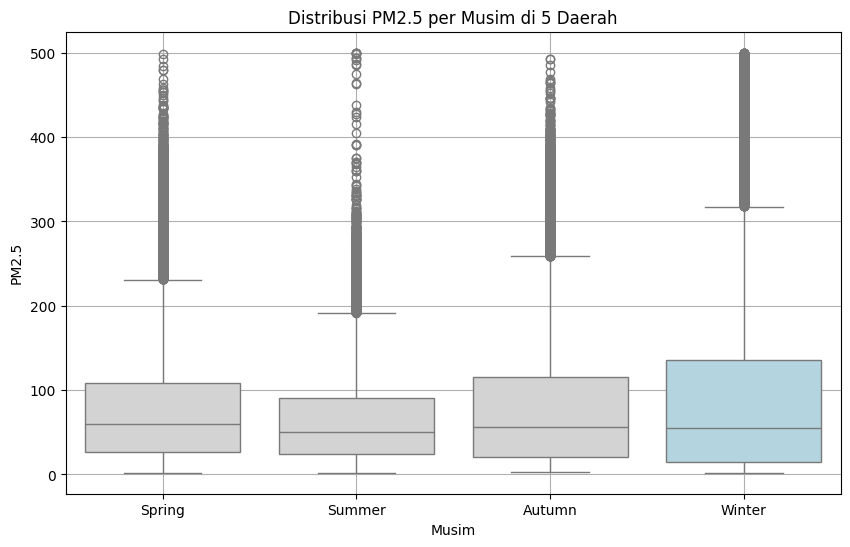

In [34]:
# Fungsi untuk menentukan musim berdasarkan bulan
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Tambahkan kolom season
all_df["season"] = all_df["date"].dt.month.apply(get_season)

# Atur palet warna: Warna lebih pucat untuk Spring, Summer, Autumn, dan lebih mencolok untuk Winter
palette_colors = {'Spring': 'lightgray', 'Summer': 'lightgray', 'Autumn': 'lightgray', 'Winter': 'lightblue'}

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='PM2.5', data=all_df, hue='season', palette=palette_colors, dodge=False)

# Tambahkan judul dan label
plt.title("Distribusi PM2.5 per Musim di 5 Daerah")
plt.xlabel("Musim")
plt.ylabel("PM2.5")
plt.grid(True)

# Tampilkan plot
plt.show()

**Insight**
- Musim Dingin (Winter) menunjukkan tingkat polusi (PM2.5) yang lebih tinggi dibandingkan musim lain, sedangkan Musim Panas (Summer) adalah musim yang paling rendah peningkatan polusinya dari keempat musim
- Hal ini sesuai dengan teori suhu sebelumnya, bahwa semakin rendah suhu maka polusi akan semakin tinggi karena mengendap di tanah
- Terdapat banyak outlier di semua musim, yang menunjukkan setiap musim juga memiliki hari-hari dengan polusi tinggi
- Rentang interkuartil pada Winter lebih besar, yang menunjukkan bahwa musim dingin memiliki keragaman PM2.5 lebih tinggi dari musim yang lain.

### Bagaimana distribusi tingkat polusi berdasarkan kategori (rendah, sedang, tinggi, sangat tinggi)?

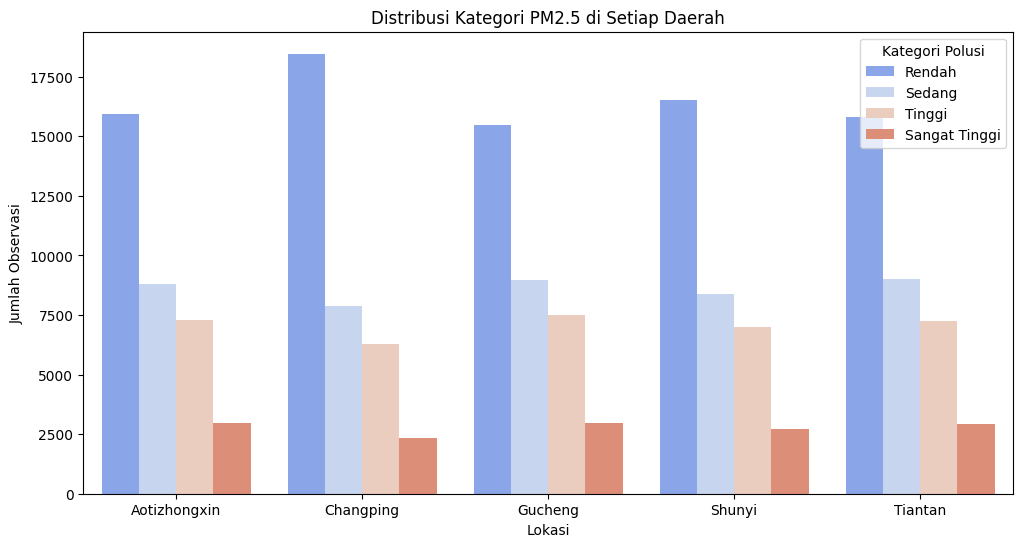

In [35]:
# Definisikan kategori berdasarkan tingkat polusi PM2.5
def categorize_pm25(value):
    if value <= 50:
        return "Rendah"
    elif value <= 100:
        return "Sedang"
    elif value <= 200:
        return "Tinggi"
    else:
        return "Sangat Tinggi"

# Tambahkan kolom kategori polusi ke dataset
all_df["Kategori_PM2.5"] = all_df["PM2.5"].apply(categorize_pm25)

# Plot countplot untuk melihat distribusi kategori polusi di setiap lokasi
plt.figure(figsize=(12, 6))
sns.countplot(x="station", hue="Kategori_PM2.5", data=all_df, palette="coolwarm")

# Tambahkan judul dan label
plt.title("Distribusi Kategori PM2.5 di Setiap Daerah")
plt.xlabel("Lokasi")
plt.ylabel("Jumlah Observasi")
plt.legend(title="Kategori Polusi")

# Tampilkan plot
plt.show()

**Insight** 
- Pada semua daerah didominasi oleh kategori polusi rendah, oleh karena itu polusi udara di sebagian besar waktu masih dalam kategori aman
- Kategori polusi sangat tinggi lebih menonjol di Aotizhongxin dan Gucheng dibanding daerah lain, menunjukkan polusi udara ekstrim terjadi di beberapa periode waktu
- Di Changping, Shunyi dan Tiantan terlihat memiliki kategori sangat tinggi yang lebih sedikit, menunjukkan bahwa kualitas udara lebih stabil

### Seberapa sering suatu daerah mengalami lonjakan polusi pada tahun 2013-2017? : 

      Aotizhongxin  Changping    Gucheng     Shunyi    Tiantan
year                                                          
2013     82.213741  72.333152  81.372339  75.636634  83.021691
2014     89.163633  79.606758  89.473156  84.396781  86.100354
2015     79.680300  68.699121  80.450755  78.916920  80.132362
2016     73.260277  60.946677  76.095846  69.976771  73.172515
2017     89.802383  76.847852  88.387911  85.358972  91.449531


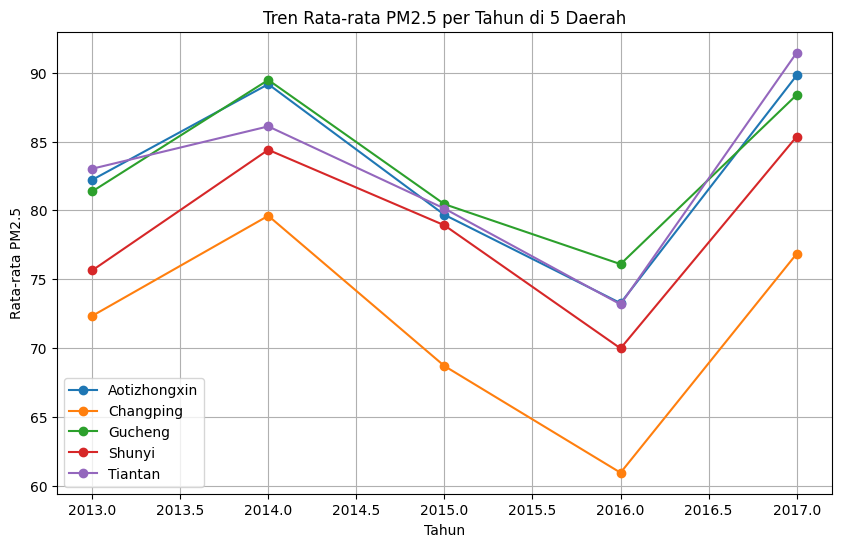

In [36]:
# Buat DataFrame kosong untuk menyimpan rata-rata PM2.5 per tahun
pm25_per_year = pd.DataFrame()

# Hitung rata-rata PM2.5 per tahun untuk masing-masing daerah
for area, df in data_aqi.items():
    df["year"] = df["date"].dt.year  # Ekstrak tahun dari date
    yearly_avg = df.groupby("year")["PM2.5"].mean()  # Group by year dan hitung rata-rata
    pm25_per_year[area] = yearly_avg  # Simpan hasilnya

# Tampilkan tabel rata-rata PM2.5 per tahun
print(pm25_per_year)

# Plot tren PM2.5 per tahun untuk setiap daerah
plt.figure(figsize=(10, 6))
for area in pm25_per_year.columns:
    plt.plot(pm25_per_year.index, pm25_per_year[area], marker="o", label=area)

plt.xlabel("Tahun")
plt.ylabel("Rata-rata PM2.5")
plt.title("Tren Rata-rata PM2.5 per Tahun di 5 Daerah")
plt.legend()
plt.grid()
plt.show()

**Insight**
- Dalam rentang tahun 2013-2017, semua daerah mengalami 2 lonjakan polusi yang besar yaitu pada tahun 2014 dan 2017
- 2014 adalah tahun dengan lonjakan paling tinggi di semua daerah, menunjukkan bahwa kondisi polusi di Beijing memburuk secara luas
- Tahun 2016 memiliki angka PM2.5 yang paling rendah, terutama pada daerah Changping

## Analisis Lanjutan

### Binning 

C:\Users\Dell\AppData\Local\Temp\ipykernel_6168\857906350.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="tingkat_polusi", data=all_df, palette="viridis", order=all_df["tingkat_polusi"].value_counts().index)


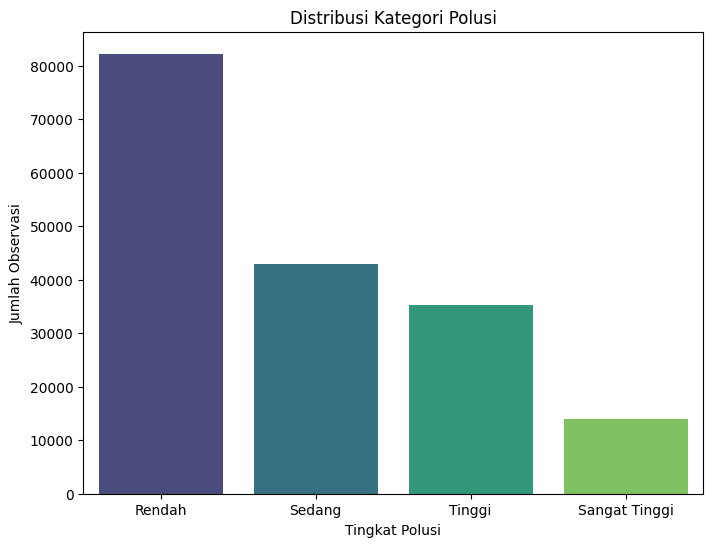

In [51]:
datasets = [Aotizhongxin_df, Changping_df, Gucheng_df, Shunyi_df, Tiantan_df]

# Kategori binning kadar PM2.5
bins = [0, 50, 100, 200, np.inf]  
labels = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"] 

# Lakukan binning pada tiap dataset
df_binned_list = []
for df in datasets:
    df = df.copy()  # Salin dataframe agar tidak mengubah aslinya
    df['tingkat_polusi'] = pd.cut(df['PM2.5'], bins=bins, labels=labels, include_lowest=True)
    df_binned_list.append(df)

# Gabungkan semua dataset setelah binning
all_df = pd.concat(df_binned_list, ignore_index=True)
all_df.head(100)

# Plot distribusi kategori Polusi
plt.figure(figsize=(8, 6))
sns.countplot(x="tingkat_polusi", data=all_df, palette="viridis", order=all_df["tingkat_polusi"].value_counts().index)
plt.title("Distribusi Kategori Polusi")
plt.xlabel("Tingkat Polusi")
plt.ylabel("Jumlah Observasi")
plt.show()

Analisis yang dilakukan adalah binning, dengan tujuan mengelompokkan nilai dari kadar CO ke dalam kategori (Rendah, Sedang, Tinggi, Sangat Tinggi). Mempermudah interpretasi data dengan mengelompokkan variabel kontinu dalam kategori, dan berguna untuk melihat distribusi polusi di kelima daerah.

### Analisis Korelasi

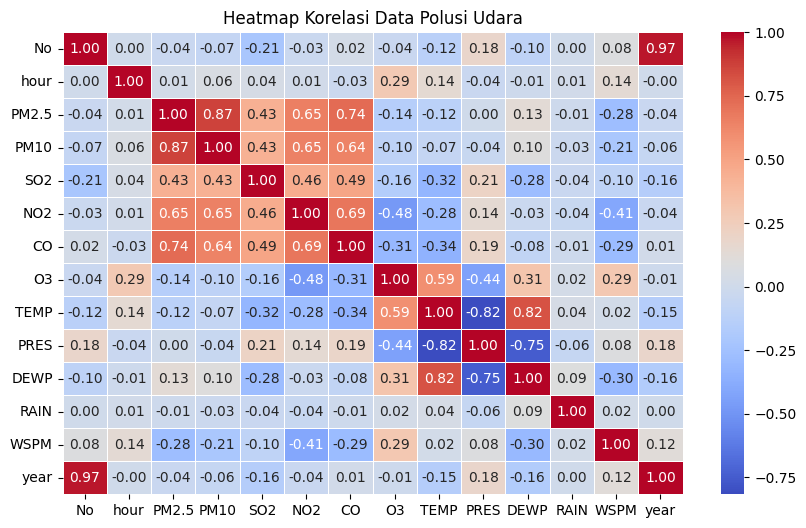

In [45]:
# Hitung korelasi untuk heatmap (hanya numerik)
corr_matrix = all_df.select_dtypes(include=[np.number]).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Data Polusi Udara")
plt.show()

Analisis lanjutan ini dilakukan dengan tujuan mengetahui hubungan antar variabel, dan identifikasi variabel yang mempengaruhi polutan. Melihat variabel yang paling berpengaruh dengan keeratan korelasinya.

**Insight**  
Berdasarkan Heatmap Korelasi Data Polusi Udara diatas:
- PM2.5 dan PM10 sangat berkorelasi positif, menunjukkan sumber polusi yang serupa
- NO2 dan SO2 berkorelasi dengan PM2.5 dan PM10 , menunjukkan kemungkinan sumber polusi serupa
- Ozon (O3) memiliki korelasi negatif dengan PM 2.5 dan PM10, menunjukkan efek reaksi kimia di atmosfer
- Karbon monoksida (CO) menunjukkan korelasi positif
- Kecepatan Angin (WSPM) berkorelasi negatif dengan PM10, menunjukkan bahwa angin membantu penyebaran polusi. Semakin kuat angin, polusi semakin menurun
- Suhu (TEMP) jugu berkorelasi negatif dengan PM2.5 dan PM 2.10, sama dengan angin yang menurunkan kadar polusi
- Hujan (RAIN) dan tekanan udara (PRES) juga berkorelasi negatif dengan polutan, maka mempunyai efek dalam penurunan kadar polusi
- Titik Embun (DEWP) berkorelasi lemah dengan polutan, yang menandakan bahwa variabel ini tidak memiliki banyak pengaruh terhadap polusi

## Conclusion

- Berdasarkan distribusi polusi di 5 daerah permusim, diperoleh pola bahwa pada musim dengan suhu rendah kadar polusi akan meningkat karena sulit menyebar dan cenderung mengendap pada suatu daerah. Sebaliknya, suhu yang tinggi akan menurunkan kadar polusi karena akan lebih menyebar. Dibuktikan dengan musim dingin memiliki tingkat polusi udara (PM2.5) tertinggi dibanding musim lain, sedangkan musim panas memiliki tingkat polusi terendah. 
- Distribusi tingkat polusi udara menunjukkan dominasi kategori polusi rendah di semua daerah, yang berarti sebagian besar waktu kualitas udara kelima daerah dalam batas aman. Namun pada daerah Aotizhongxin dan Gucheng pernah terjadi polusi udara ekstrim di periode waktu tertentu dibanding daerah lain, sebaliknya Changping, Shunyi, dan Tiantan menunjukkan kualitas udara yang lebih stabil dan cenderung baik.
- Dalam periode tahun 2013-2017, semua daerah mengalami 2 lonjakan polusi yang besar pada tahun 2014 dan 2017. Lonjakan terbesar terjadi pada tahun 2014, menunjukkan kondisi polusi di Beijing memburuk secara luas. Tahun 2016 menjadi tahun dengan tingkat polusi paling rendah, terutama di Changping, hal ini menunjukkan adanya perbaikan kualitas udara.
- Berdasarkan korelasi dari data kualitas udara setiap daerah, diperoleh bahwa PM2.5, PM10, SO2, dan NO2 kemungkinan memiliki sumber polusi yang serupa. Kecepatan angin (WSPM), Suhu (TEMP), Hujan (RAIN), dan Tekanan Udara (PRES) berpengaruh terhadap naik dan turunnya kadar polusi.